In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Налаштування візуалізацій
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Завантажуємо дані з часовими ознаками
data_path = '../data/data_with_temporal_features.csv'
df = pd.read_csv(data_path, index_col='DateTime', parse_dates=True)

# Для декомпозиції нам потрібен лише один стовпець
# і ми будемо працювати з денними даними, щоб краще бачити річні тренди
df_daily_resampled = df['Global_active_power'].resample('D').sum()

print("Денні дані для декомпозиції готові. Розмір:", df_daily_resampled.shape)

Денні дані для декомпозиції готові. Розмір: (1441,)


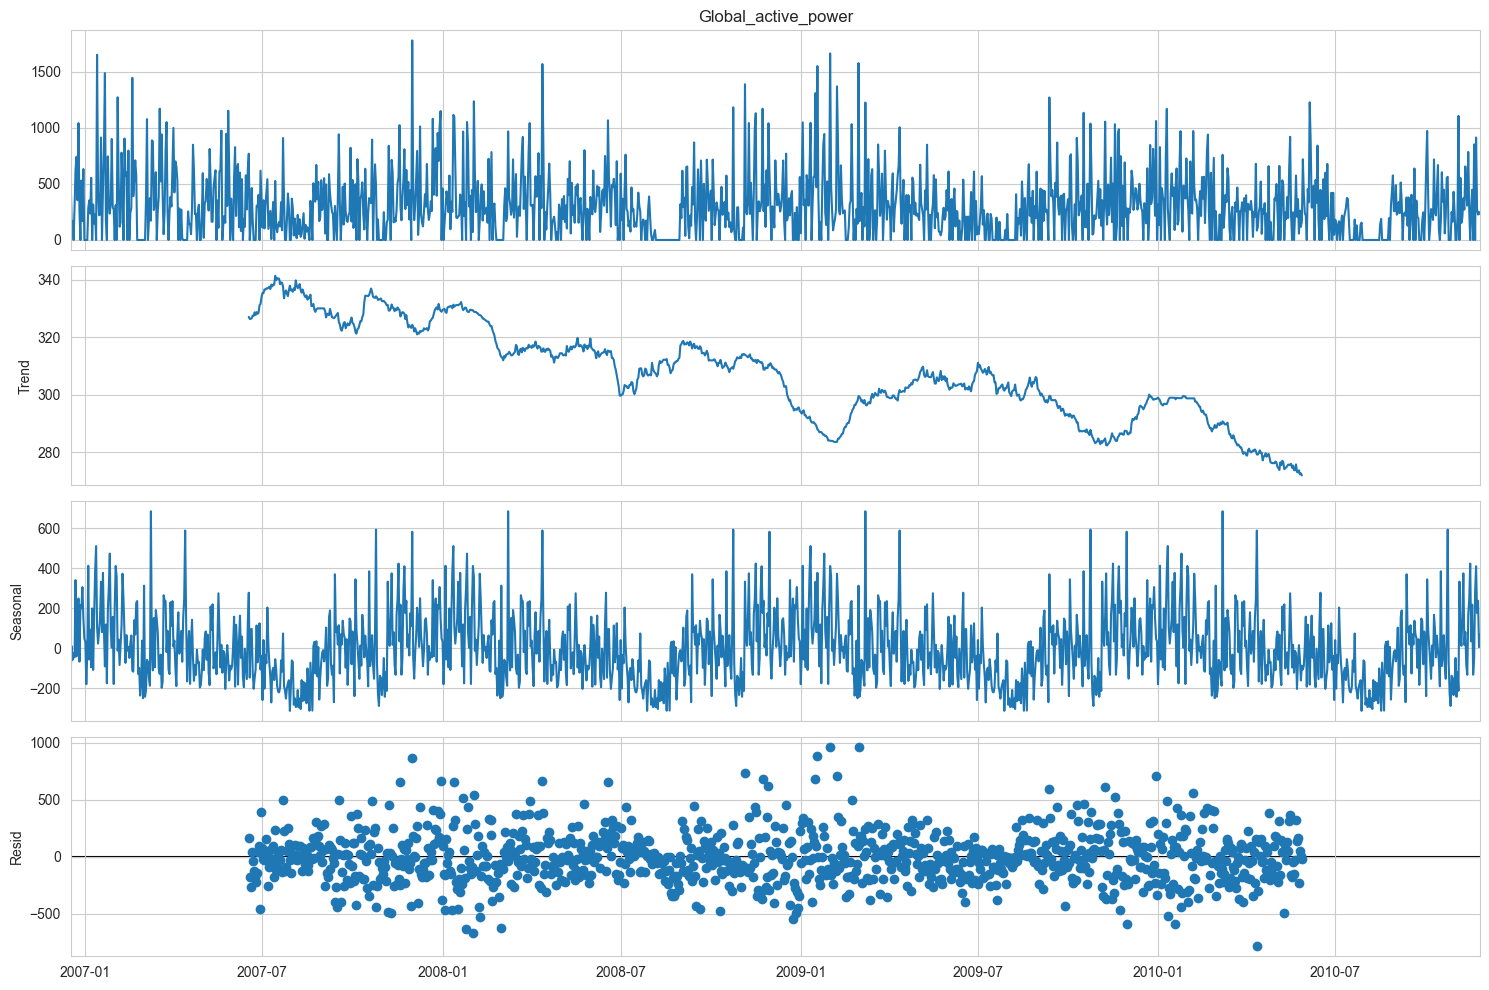

In [5]:
# Виконуємо декомпозицію. period=365 вказує на річну сезонність.
decomposition = seasonal_decompose(df_daily_resampled, model='additive', period=365)

# Візуалізуємо компоненти
fig = decomposition.plot()
plt.show()

In [6]:
# Завантажуємо наш основний датасет з лагами та ковзними середніми
final_features_path = '../data/final_features_dataset.csv'
df_final = pd.read_csv(final_features_path, index_col='DateTime', parse_dates=True)

# Додаємо тренд і сезонність
df_final['trend'] = decomposition.trend.reindex(df_final.index, method='ffill')
df_final['seasonal'] = decomposition.seasonal.reindex(df_final.index, method='ffill')


df_final.bfill(inplace=True)

print("Перші 5 рядків з ознаками тренду та сезонності:")
display(df_final[['Global_active_power', 'trend', 'seasonal']].head())

Перші 5 рядків з ознаками тренду та сезонності:


,Global_active_power,trend,seasonal
DateTime,,,
2006-12-24 15:00:00,47.476,327.138537,143.947035
2006-12-24 16:00:00,63.618,327.138537,143.947035
2006-12-25 11:00:00,79.308,327.138537,248.558638
2006-12-25 12:00:00,171.328,327.138537,248.558638
2006-12-25 13:00:00,97.054,327.138537,248.558638
